# Introduction
Basic statistic for beginners
* [Histogram](#1)
* [Outliers](#2)
* [Box Plot ](#3)
* [Summary Statistics](#4)
* [CDF](#5)
* [Effect size](#6)
* [Relationship Between Variables](#7)
* [Correlation](#8)
* [Covariance](#9)
* [Pearson Correlation](#10)
* [Spearman's Rank Correlation](#11)
* [Mean VS Median](#12)
* [Hypothesis Testing](#13)
* [Normal(Gaussian) Distribution and z-score](#14) 


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import plotting
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input"))

# Any results you write to the current directory are saved as output.

['breast-cancer-wisconsin.data', 'breast-cancer-wisconsin.names', 'Index', 'unformatted-data', 'wdbc.data', 'wdbc.names', 'wpbc.data', 'wpbc.names']


In [2]:
# read data as pandas data frame
data = pd.read_csv("input/wdbc.data")
new_names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
data.columns = new_names
data = data.drop(['id'],axis = 1)#(['Unnamed: 32','id'],axis = 1)

In [3]:
# quick look to data
data.head()
data.shape # (568, 32)
data.columns 

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<a id="1"></a> <br>
## Histogram
* How many times each value appears in dataset. This description is called the distribution of variable
* Most common way to represent distribution of variable is histogram that is graph which shows frequency of each value
* Frequency = number of times each value appears
* Example: [1,1,1,1,2,2,2]. Frequency of 1 is four and frequency of 2 is three

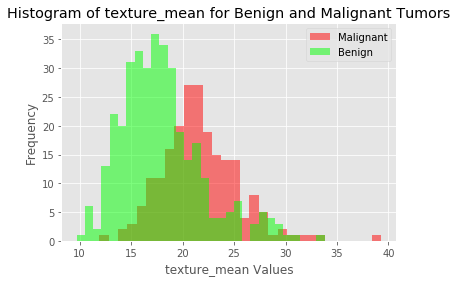

Most frequent malignant texture_mean is:  20.107


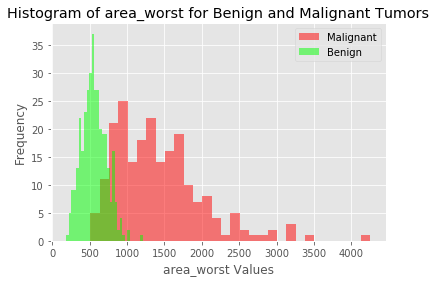

Most frequent malignant area_worst is:  882.69


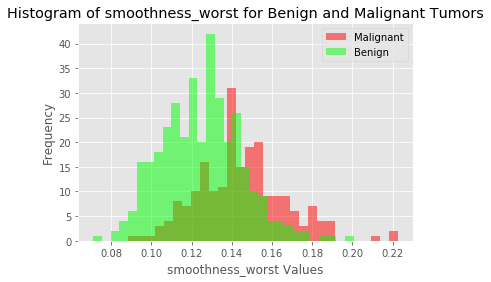

Most frequent malignant smoothness_worst is:  0.13749266666666668


In [4]:
for feature in ['texture_mean', 'area_worst', 'smoothness_worst']:
    m = plt.hist(data[data["diagnosis"] == "M"][feature],bins=30,fc = (1,0,0,0.5),label = "Malignant")
    b = plt.hist(data[data["diagnosis"] == "B"][feature],bins=30,fc = (0,1,0,0.5),label = "Benign")
    plt.legend()
    plt.xlabel("{} Values".format(feature))
    plt.ylabel("Frequency")
    plt.title("Histogram of {} for Benign and Malignant Tumors".format(feature))
    plt.show()
    frequent_malignant_texture_mean = m[0].max()
    index_frequent_malignant_texture_mean = list(m[0]).index(frequent_malignant_texture_mean)
    most_frequent_malignant_texture_mean = m[1][index_frequent_malignant_texture_mean]
    print("Most frequent malignant {} is: ".format(feature),most_frequent_malignant_texture_mean)

* Lets look at other conclusions
* From this graph you can see that texture mean of malignant tumors are bigger than tetxture mean of benign tumors mostly.
* The benign distribution (green in graph) is approximately bell-shaped that is shape of normal distribution (gaussian distribution) in all histograms
* The malignant distribution (red in graph) is approximately bell-shaped that is shape of normal distribution (gaussian distribution) only in first histogram
* Also you can find result like that most frequent malignant texture mean, malignant area worst and malignant smoothness worst are

<a id="2"></a> <br>
## Outliers
* While looking histogram as you can see there are rare values in benign distribution (green in graph)
* There values can be errors or rare events
* These errors and rare events can be called outliers
* Calculating outliers: 
    * first we need to calculate first quartile (Q1)(25%)
    * then find IQR(inter quartile range) = Q3-Q1
    * finally compute Q1 - 1.5*IQR and Q3 + 1.5*IQR
    * Anything outside this range is an outlier
    * lets write the code for benign tumor distribution for feature texture mean

In [5]:
data_benign = data[data["diagnosis"] == "B"]
data_malignant = data[data["diagnosis"] == "M"]
for feature in ['texture_mean', 'area_worst', 'smoothness_worst']:
    desc = data_benign[feature].describe()
    Q1 = desc[4]
    Q3 = desc[6]
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    print(feature)
    print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
    data_benign[data_benign[feature] < lower_bound][feature]
    print("Outliers: ",data_benign[(data_benign[feature] < lower_bound) | (data_benign[feature] > upper_bound)][feature].values)

texture_mean
Anything outside this range is an outlier: ( 8.235 , 26.675000000000004 )
Outliers:  [27.08 33.81 27.85 28.21 28.23 30.72 29.29 28.2  26.99 28.14 29.97 28.06
 29.43 28.92 27.61 27.88 27.15 29.37]
area_worst
Anything outside this range is an outlier: ( 112.75000000000006 , 1004.3499999999999 )
Outliers:  [1032. 1009. 1210.]
smoothness_worst
Anything outside this range is an outlier: ( 0.0696 , 0.1784 )
Outliers:  [0.1902 0.2006 0.185 ]


<a id="3"></a> <br>
## Box Plot 
* You can see outliers also from box plots
* We found 3 outlier in benign texture_mean/area_worst/smoothness_worst and in box plot there are outliers (espiecially by area_worst).

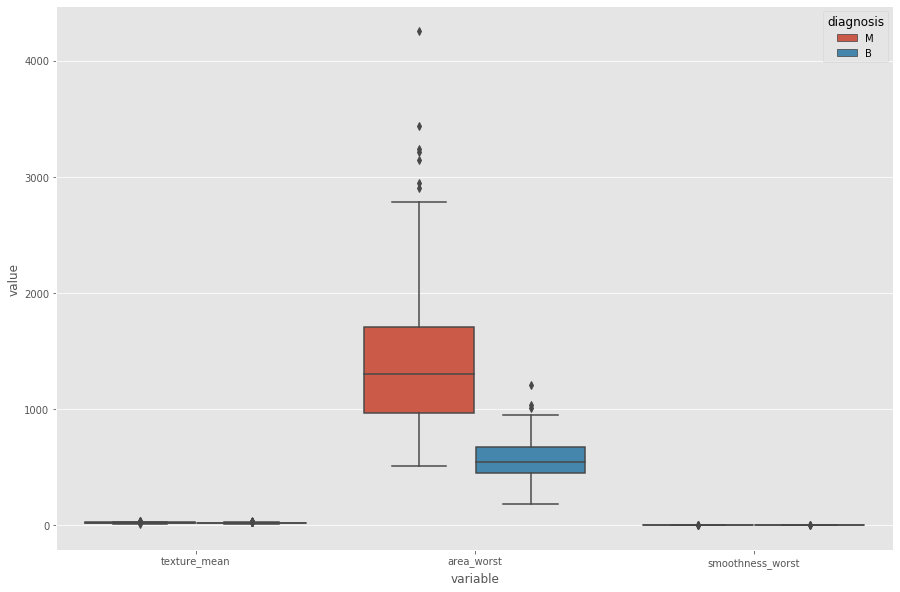

In [6]:
melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = ['texture_mean', 'area_worst', 'smoothness_worst'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

<a id="4"></a> <br>
## Summary Statistics
* Mean
* Variance: spread of distribution
* Standard deviation square root of variance
* Lets look at summary statistics of benign tumor radiance mean

In [7]:
for feature in ['texture_mean', 'area_worst', 'smoothness_worst']:
    print(feature)
    print("mean: ",data_benign[feature].mean())
    print("variance: ",data_benign[feature].var())
    print("standard deviation (std): ",data_benign[feature].std())
    print("describe method: ",data_benign[feature].describe())

texture_mean
mean:  17.914761904761892
variance:  15.961020518994113
standard deviation (std):  3.995124593675911
describe method:  count    357.000000
mean      17.914762
std        3.995125
min        9.710000
25%       15.150000
50%       17.390000
75%       19.760000
max       33.810000
Name: texture_mean, dtype: float64
area_worst
mean:  558.8994397759104
variance:  26765.42589856166
standard deviation (std):  163.60142388916321
describe method:  count     357.000000
mean      558.899440
std       163.601424
min       185.200000
25%       447.100000
50%       547.400000
75%       670.000000
max      1210.000000
Name: area_worst, dtype: float64
smoothness_worst
mean:  0.12495949579831929
variance:  0.0004005387896327071
standard deviation (std):  0.020013465208022
describe method:  count    357.000000
mean       0.124959
std        0.020013
min        0.071170
25%        0.110400
50%        0.125400
75%        0.137600
max        0.200600
Name: smoothness_worst, dtype: float64


# <a id="5"></a> <br>
## CDF
* Cumulative distribution function is the probability that the variable takes a value less than or equal to x. P(X <= x)
* Lets explain in cdf graph of benign radiues mean
* in graph, what is P(17 < X)? The answer is 0.5. The probability that the variable takes a value less than or equal to 17(texture mean) is 0.5
* You can plot cdf with two different method

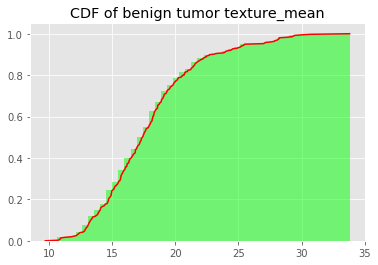

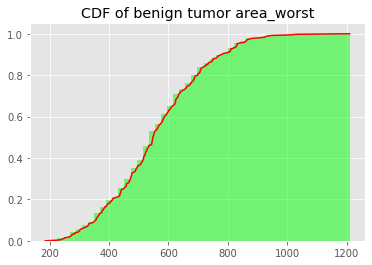

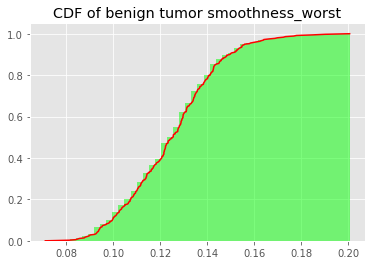

In [8]:
for feature in ['texture_mean', 'area_worst', 'smoothness_worst']:
    plt.hist(data_benign[feature],bins=50,fc=(0,1,0,0.5),label='Benign',normed = True,cumulative = True)
    sorted_data = np.sort(data_benign[feature])
    y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
    plt.plot(sorted_data,y,color='red')
    plt.title('CDF of benign tumor {}'.format(feature))
    plt.show()

<a id="6"></a> <br>
## Effect size
* One of the summary statistics
* It describes size of an effect. It is simple way of quantifying the difference between two groups
* In an other saying, effect size emphasises the size of the difference
* Use cohen effect size
* Cohen suggest that if d(effect size)= 0.2, it is small effect size, d = 0.5 medium effect size, d = 0.8 large effect size
* lets compare size of the effect between benign texture mean/areaworst/smoothnessworst and malignant texture mean/areaworst/smoothnessworst
* Effect sizes are 0.96, 2.2 and 0.95 that are big (2.2 too big) and says that two groups are different from each other as we expect. Because our groups are benign texture mean/areaworst/smoothnessworst and malignant texture mean/areaworst/smoothnessworst that are different from each other

In [9]:
for feature in ['texture_mean', 'area_worst', 'smoothness_worst']:
    print(feature)
    mean_diff = data_malignant[feature].mean() - data_benign[feature].mean()
    var_benign = data_benign[feature].var()
    var_malignant = data_malignant[feature].var()
    var_pooled = (len(data_benign)*var_benign +len(data_malignant)*var_malignant ) / float(len(data_benign)+ len(data_malignant))
    effect_size = mean_diff/np.sqrt(var_pooled)
    print("Effect size: ",effect_size)

texture_mean
Effect size:  0.9620630872277759
area_worst
Effect size:  2.224547995617571
smoothness_worst
Effect size:  0.9553064445230464


<a id="7"></a> <br>
## Relationship Between Variables
* We can say that two variables are related with each other, if one of them gives information about others
* For example, price and distance. If you go long distance with taxi you will pay more. Therefore we can say that price and distance are positively related with each other
* Scatter Plot
* Simplest way to check relationship between two variables
* Lets look at relationship between texture mean/area worst/smoothness worst
* In scatter plot you can see that when texture mean increases, area worst hardly increases. Therefore, they are not correlated with each other
* There is nearly no correlation between texture mean and smoothness worst. Because when texture mean changes, smoothness worst is not affected by change of tetxture mean
* There is nearly no correlation between area worst and smoothness worst

<Figure size 1080x720 with 0 Axes>

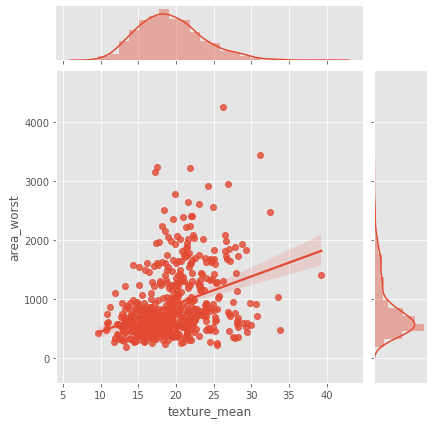

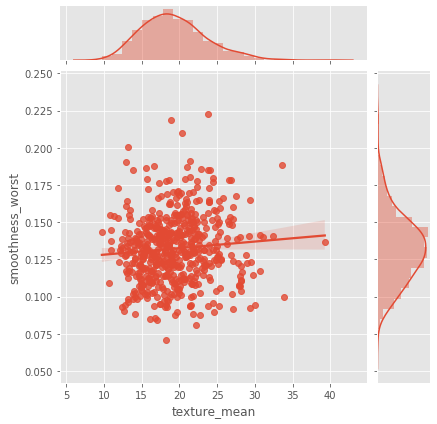

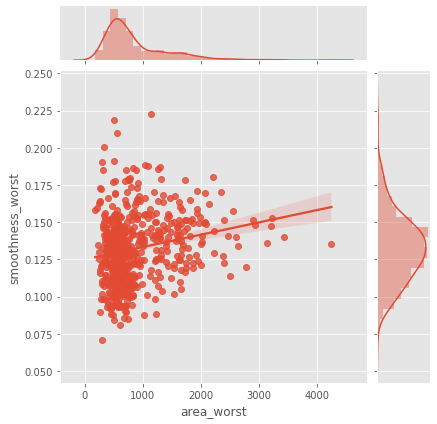

In [10]:
plt.figure(figsize = (15,10))
sns.jointplot(data.texture_mean, data.area_worst,kind="regg")
plt.show()
sns.jointplot(data.texture_mean, data.smoothness_worst,kind="regg")
plt.show()
sns.jointplot(data.area_worst, data.smoothness_worst,kind="regg")
plt.show()

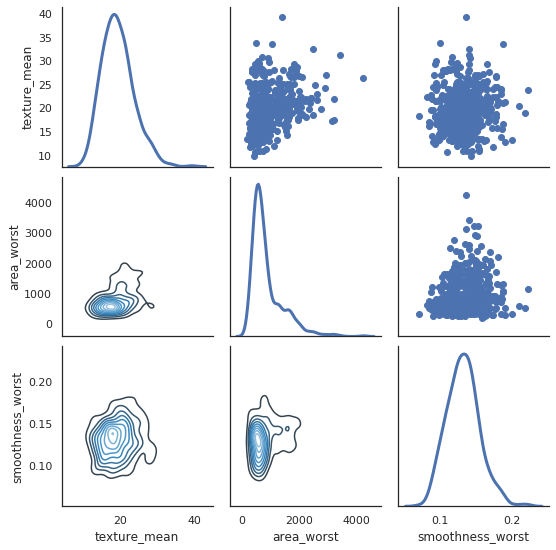

In [11]:
# Also we can look relationship between more than 2 distribution
sns.set(style = "white")
df = data.loc[:,["texture_mean","area_worst","smoothness_worst"]]
g = sns.PairGrid(df,diag_sharey = False,)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw =3)
plt.show()

<a id="8"></a> <br>
## Correlation
* Strength of the relationship between two variables
* Lets look at correlation between all features.

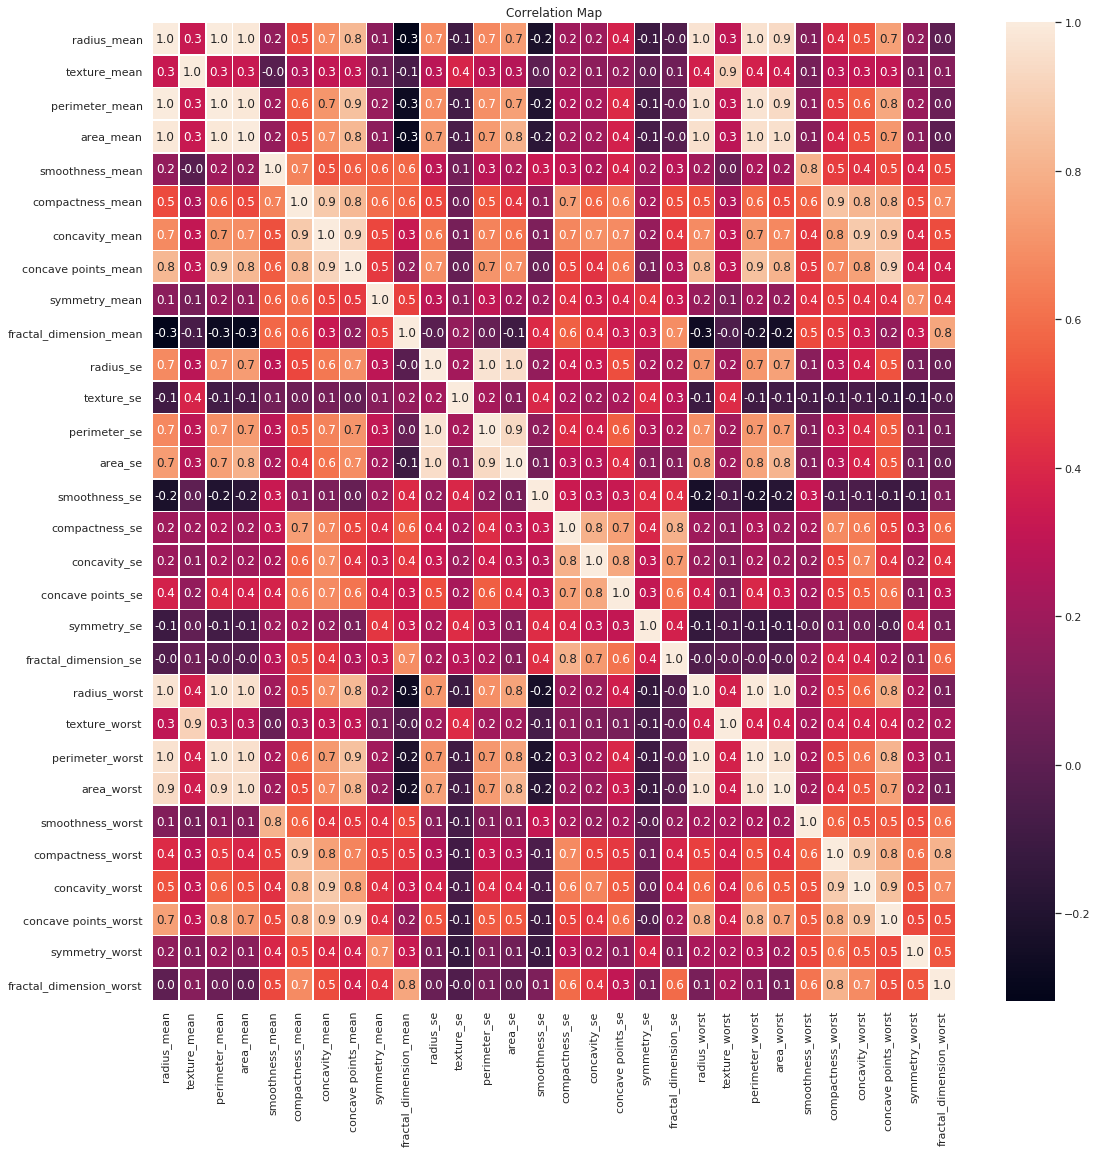

In [12]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

* Huge matrix that includes a lot of numbers
* The range of this numbers are -1 to 1 
* Meaning of 1 is two variable are positively correlated with each other like radius mean and area mean
* Meaning of zero is there is no correlation between variables like radius mean and fractal dimension se
* Meaning of -1 is two variables are negatively correlated with each other like radius mean and fractal dimension mean. Actually, correlation between of them is not -1, it is -0.3 but the idea is that if sign of correlation is negative that means that there is negative correlation.

<a id="9"></a> <br>
## Covariance
* Covariance is measure of the tendency of two variables to vary together
* So covariance is maximized if two vectors are identical
* Covariance is zero if they are orthogonal.
* Covariance is negative if they point in opposite direction
* Lets look at covariance between texture mean and area worst. Then look at texture mean and smoothness worst and finally at area worst and smoothness worst


In [13]:
np.cov(data.texture_mean,data.area_worst)
print("Covariance between texture mean and area worst: ",data.texture_mean.cov(data.area_worst))
np.cov(data.texture_mean,data.smoothness_worst)
print("Covariance between texture mean and smoothness worst: ",data.texture_mean.cov(data.smoothness_worst))
np.cov(data.area_worst,data.smoothness_worst)
print("Covariance between area worst and smoothness worst: ",data.area_worst.cov(data.smoothness_worst))

Covariance between texture mean and area worst:  860.6877742752814
Covariance between texture mean and smoothness worst:  0.008094079181570906
Covariance between area worst and smoothness worst:  2.6636427105596545


<a id="10"></a> <br>
## Pearson Correlation
* Division of covariance by standard deviation of variables
* Lets look at pearson correlation between texture_mean/area worst/ smoothness worst
* First let's use .corr() method that we used actually at correlation part. In correlation part we actually used pearson correlation :) 
* p1 and p2 are the same. In p1 we use corr() method, in p2 we apply definition of pearson correlation (cov(A,B)/(std(A)*std(B)))
* As we expect pearson correlation between texture_mean and texture_mean is 1 that means that they are same distribution
* Also pearson correlation between texture_mean and area_worst is 0.35 that means that they are weakly positively correlated with each other and relationship between of the is very high.
* To be more clear what we did at correlation part and pearson correlation part is same.


In [14]:
p1 = data.loc[:,["texture_mean","area_worst"]].corr(method= "pearson")
p2 = data.texture_mean.cov(data.area_worst)/(data.texture_mean.std()*data.area_worst.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)
p1 = data.loc[:,["texture_mean","smoothness_worst"]].corr(method= "pearson")
p2 = data.texture_mean.cov(data.smoothness_worst)/(data.texture_mean.std()*data.smoothness_worst.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)
p1 = data.loc[:,["area_worst","smoothness_worst"]].corr(method= "pearson")
p2 = data.area_worst.cov(data.smoothness_worst)/(data.area_worst.std()*data.smoothness_worst.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
              texture_mean  area_worst
texture_mean      1.000000    0.353434
area_worst        0.353434    1.000000
Pearson correlation:  0.3534344045393801
Pearson correlation: 
                  texture_mean  smoothness_worst
texture_mean          1.000000          0.082714
smoothness_worst      0.082714          1.000000
Pearson correlation:  0.08271445048923866
Pearson correlation: 
                  area_worst  smoothness_worst
area_worst          1.000000          0.205573
smoothness_worst    0.205573          1.000000
Pearson correlation:  0.20557257280643132


<a id="11"></a> <br>
## Spearman's Rank Correlation
* Pearson correlation works well if the relationship between variables are linear and variables are roughly normal. But it is not robust, if there are outliers
* To compute spearman's correlation we need to compute rank of each value


In [15]:
ranked_data = data.rank()
spearman_corr = ranked_data.loc[:,["texture_mean","area_worst"]].corr(method= "pearson")
print("Spearman's correlation: ")
print(spearman_corr)
ranked_data = data.rank()
spearman_corr = ranked_data.loc[:,["texture_mean","smoothness_worst"]].corr(method= "pearson")
print("Spearman's correlation: ")
print(spearman_corr)
ranked_data = data.rank()
spearman_corr = ranked_data.loc[:,["area_worst","smoothness_worst"]].corr(method= "pearson")
print("Spearman's correlation: ")
print(spearman_corr)

Spearman's correlation: 
              texture_mean  area_worst
texture_mean      1.000000    0.374832
area_worst        0.374832    1.000000
Spearman's correlation: 
                  texture_mean  smoothness_worst
texture_mean          1.000000          0.105948
smoothness_worst      0.105948          1.000000
Spearman's correlation: 
                  area_worst  smoothness_worst
area_worst          1.000000          0.207001
smoothness_worst    0.207001          1.000000


* Spearman's correlation is little higher than pearson correlation
    * If relationship between distributions are non linear, spearman's correlation tends to better estimate the strength of relationship
    * Pearson correlation can be affected by outliers. Spearman's correlation is more robust. 